In [1]:
# Загружаем датасет и подключаем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Выводим первые и последние 5 строк
display(data.head())
display(data.tail())

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
# Размер датасета (строка, столбец)
data.shape

(9994, 13)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 9994


In [6]:
# Список колонок
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Ship Mode - 0
Segment - 0
Country - 0
City - 0
State - 0
Postal Code - 0
Region - 0
Category - 0
Sub-Category - 0
Sales - 0
Quantity - 0
Discount - 0
Profit - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Определим уникальные значения для целевого признака
data['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

<Axes: xlabel='Sales', ylabel='Profit'>

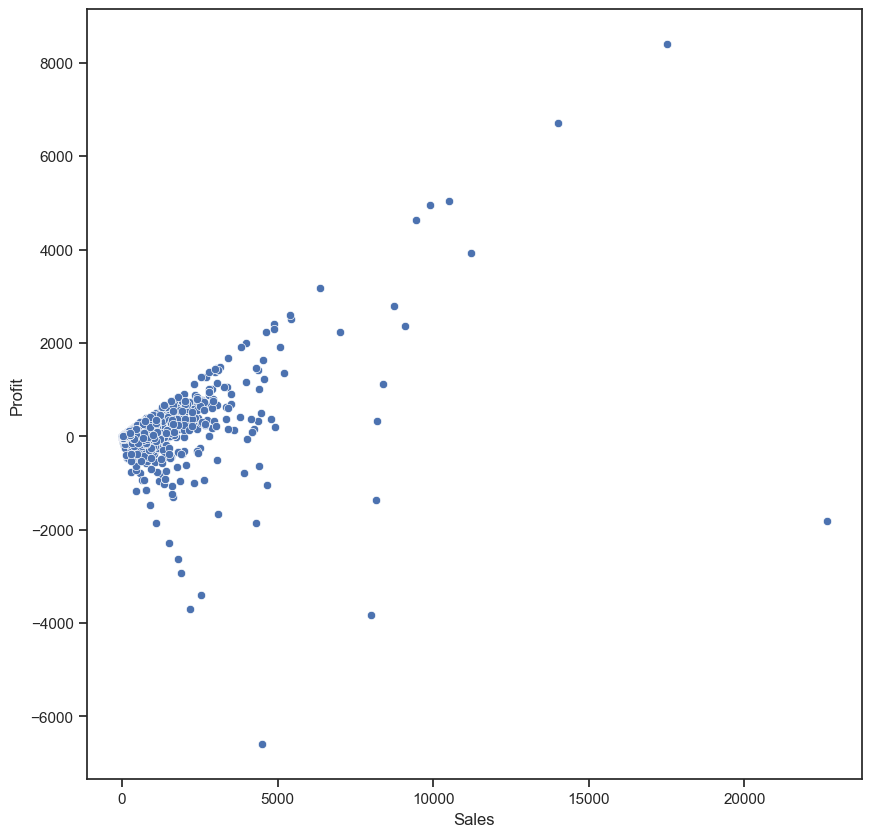

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Sales', y='Profit', data=data)

<Axes: xlabel='Sales', ylabel='Profit'>

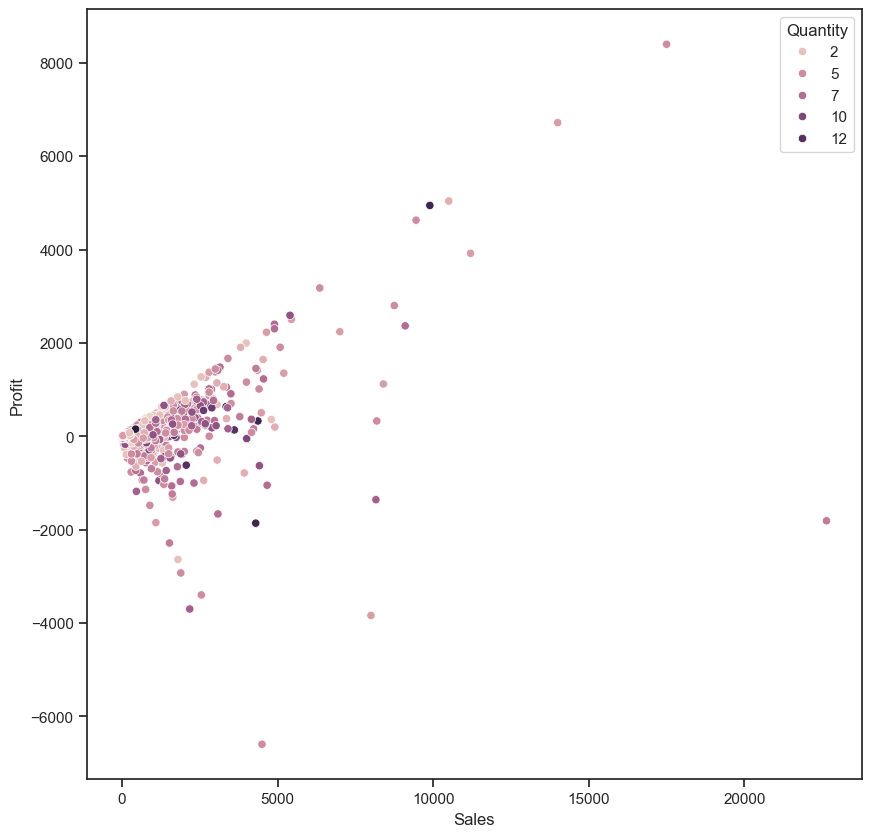

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Sales', y='Profit', data=data, hue='Quantity')

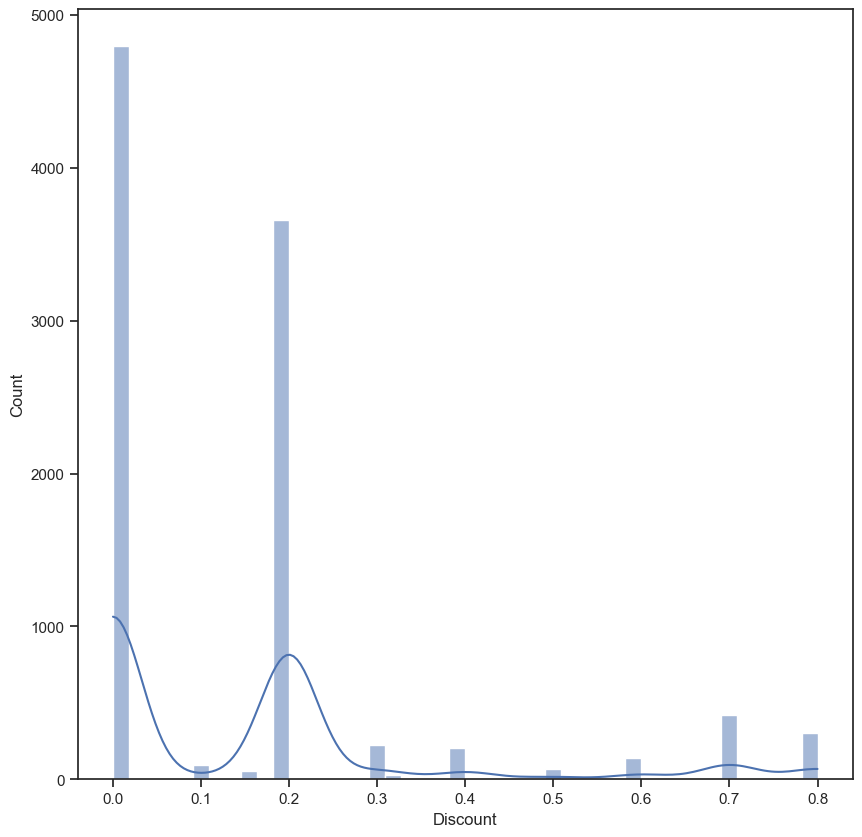

In [13]:
# Оцениваем количесвто вероятности распределения данных
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data['Discount'], kde=True)
plt.show()

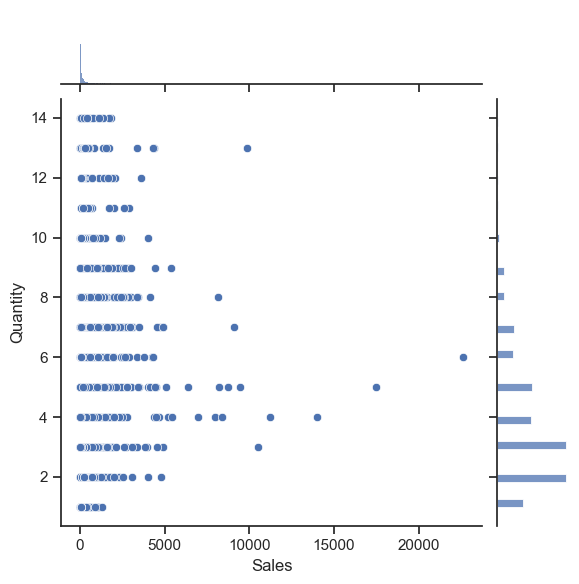

In [14]:
sns.jointplot(x='Sales', y='Quantity', data=data)

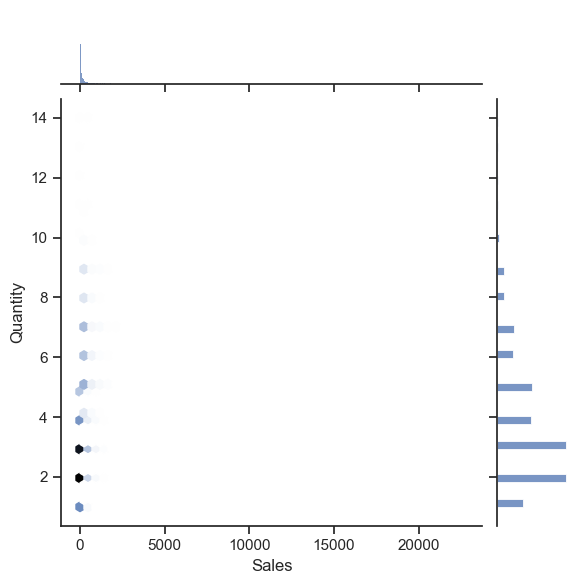

In [15]:
sns.jointplot(x='Sales', y='Quantity', data=data, kind="hex")

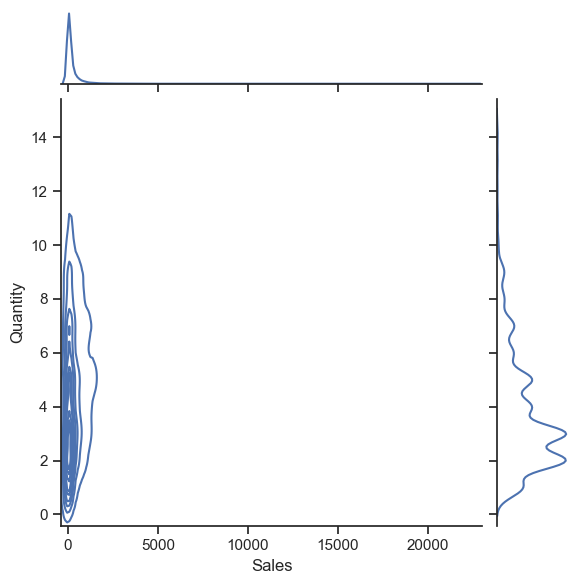

In [16]:
sns.jointplot(x='Sales', y='Quantity', data=data, kind="kde")

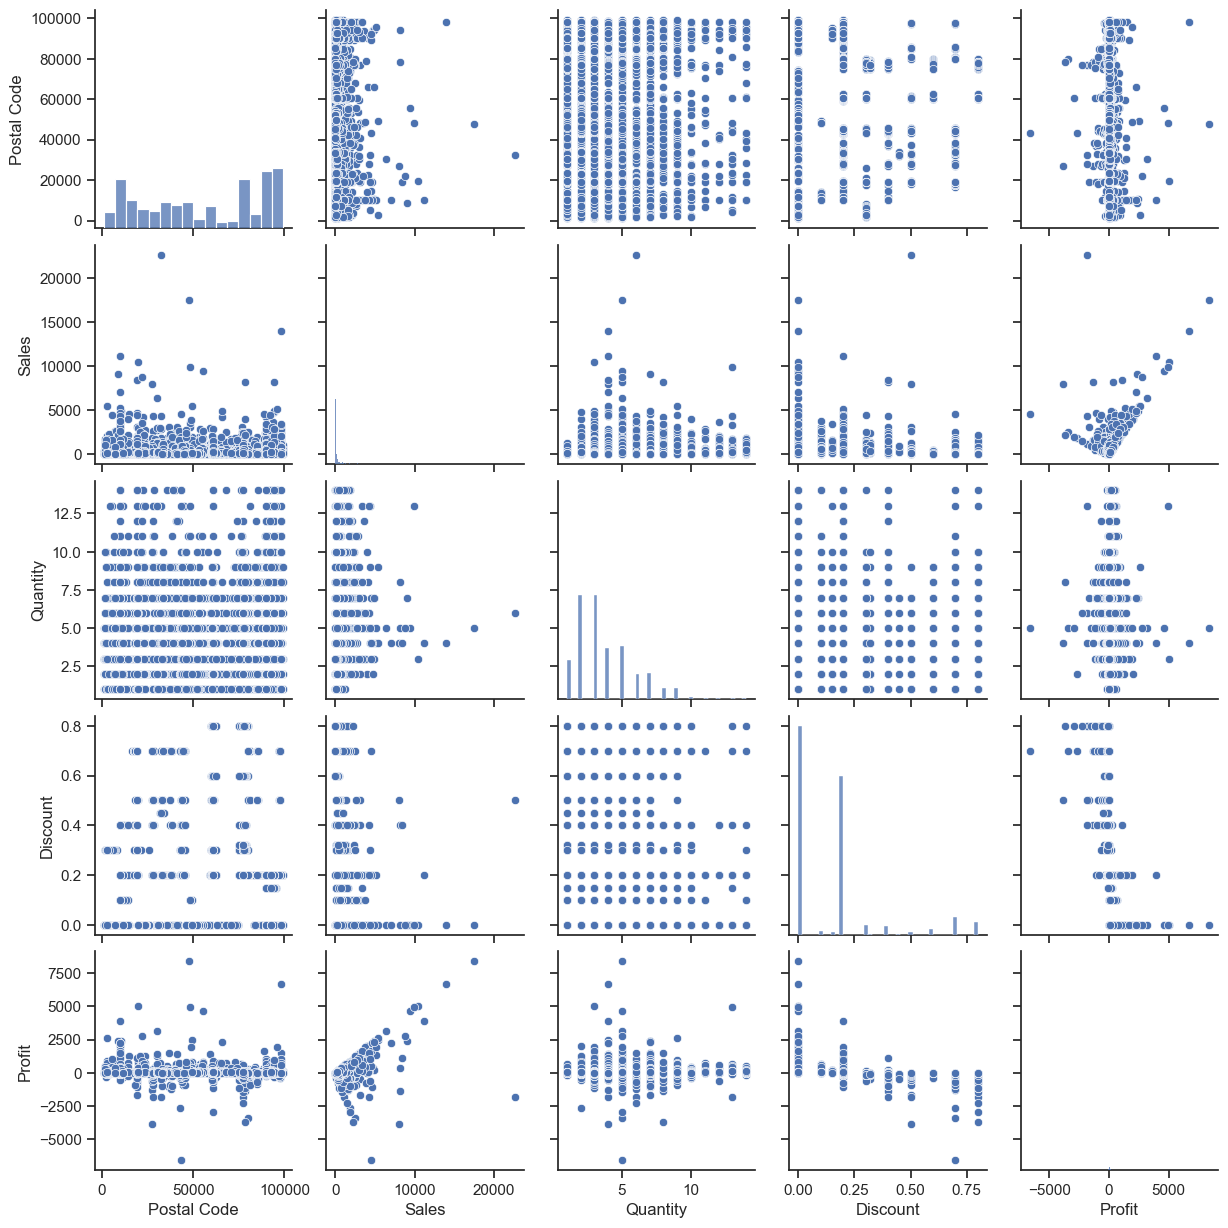

In [17]:
sns.pairplot(data)

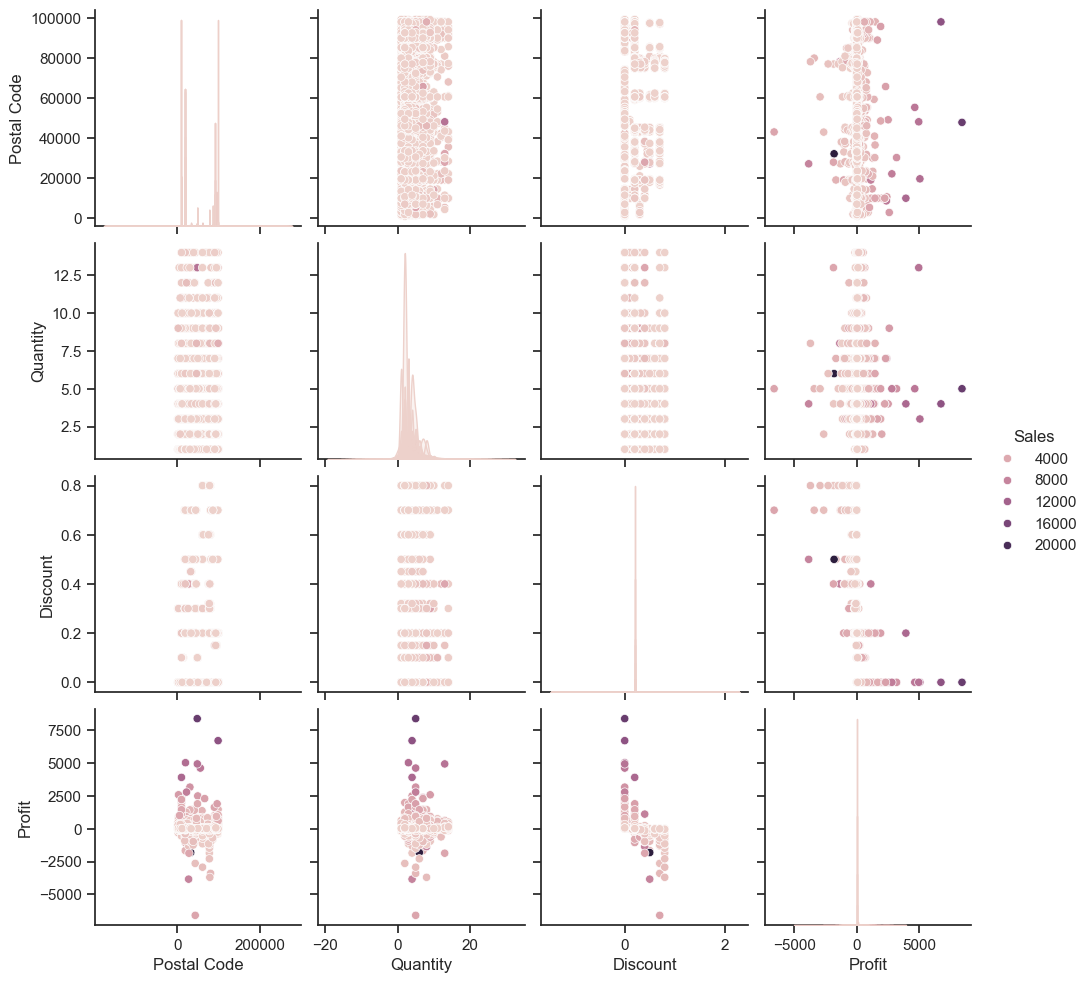

In [18]:
# С помощью параметра "hue" возможна группировка по значениям какого-либо признака.
sns.pairplot(data, hue="Sales")

<Axes: xlabel='Quantity'>

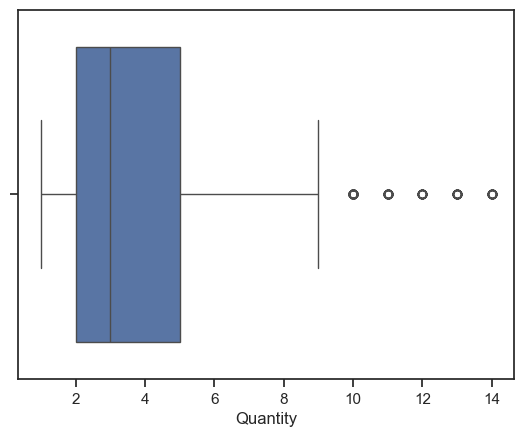

In [19]:
sns.boxplot(x=data['Quantity'])

<Axes: ylabel='Quantity'>

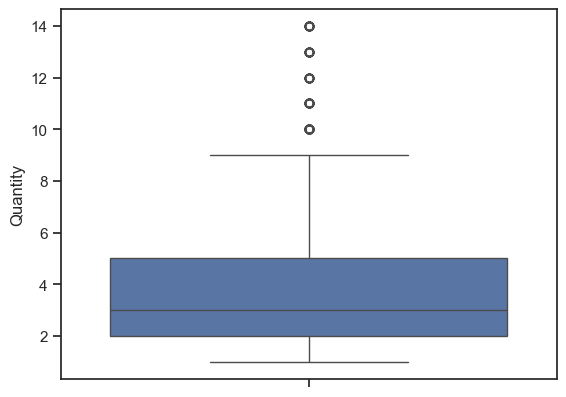

In [20]:
# По вертикали
sns.boxplot(y=data['Quantity'])

<Axes: xlabel='Quantity'>

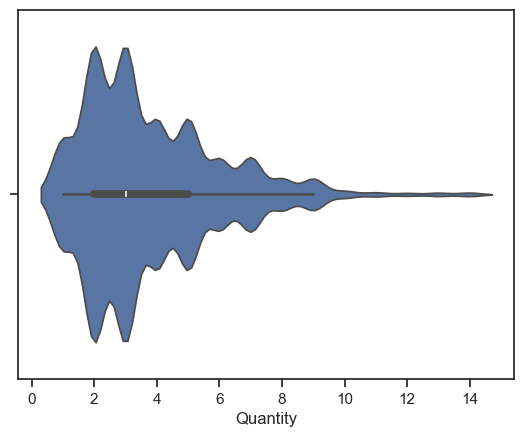

In [21]:
sns.violinplot(x=data['Quantity'])

<Axes: xlabel='Quantity', ylabel='Count'>

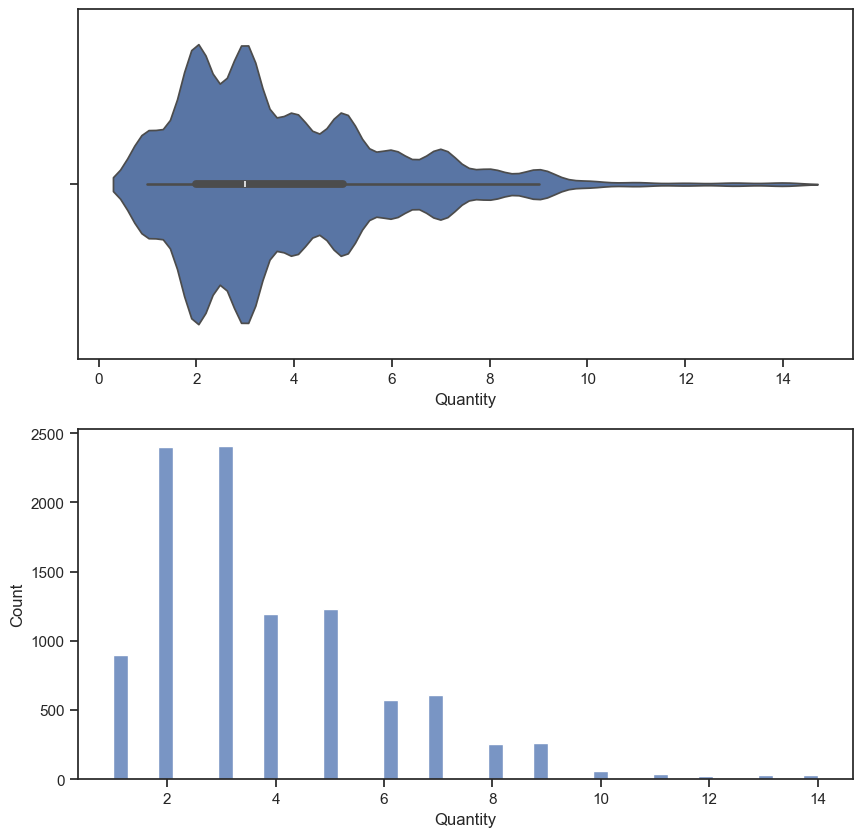

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Quantity'])
sns.histplot(data['Quantity'], ax=ax[1])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [24]:
# Преобразуем типы
data_buff = data[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()

In [25]:
data_buff.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [26]:
data_buff.corr(method='pearson')

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [27]:
data_buff.corr(method='kendall')

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.001465,0.010015,0.037496,-0.003111
Sales,-0.001465,1.000000,0.238978,-0.041826,0.452118
Quantity,0.010015,0.238978,1.000000,-0.000698,0.171843
Discount,0.037496,-0.041826,-0.000698,1.000000,-0.428205
Profit,-0.003111,0.452118,0.171843,-0.428205,1.000000


In [28]:
data_buff.corr(method='spearman')

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.002059,0.013952,0.052793,-0.005451
Sales,-0.002059,1.000000,0.327426,-0.056969,0.518407
Quantity,0.013952,0.327426,1.000000,-0.000878,0.234491
Discount,0.052793,-0.056969,-0.000878,1.000000,-0.543350
Profit,-0.005451,0.518407,0.234491,-0.543350,1.000000


<Axes: >

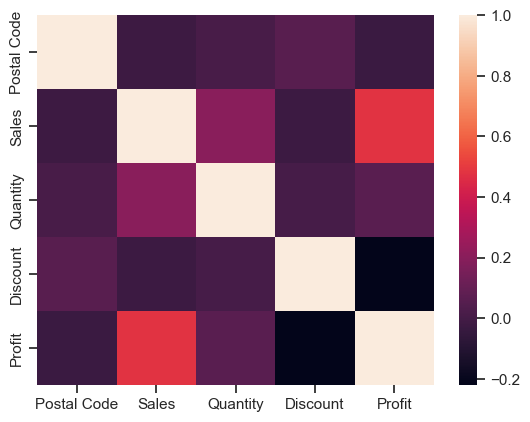

In [29]:
sns.heatmap(data_buff.corr())

<Axes: >

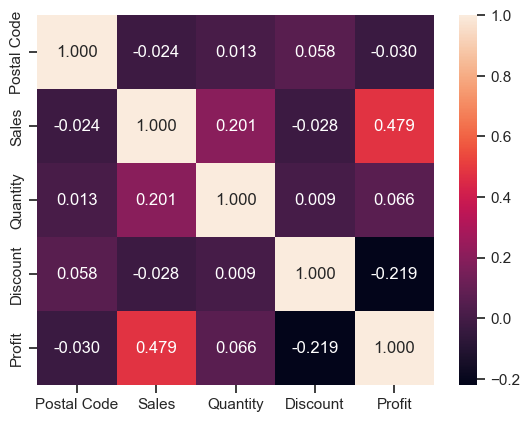

In [30]:
# Вывод значений в ячейках
sns.heatmap(data_buff.corr(), annot=True, fmt='.3f')

<Axes: >

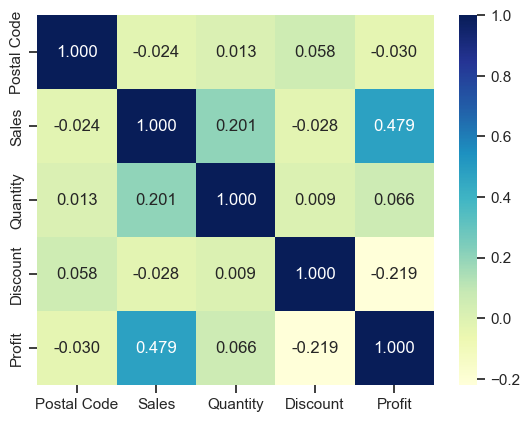

In [31]:
# Изменение цветовой гаммы
sns.heatmap(data_buff.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

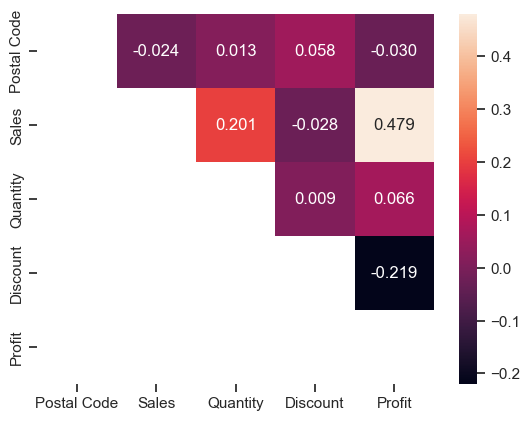

In [32]:
# Треугольный вариант матрицы
numeric_data = data.select_dtypes(include='number')
mask = np.zeros_like(numeric_data.corr(), dtype=bool)
# Оставим верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(numeric_data.corr(), mask=mask, annot=True, fmt='.3f')
plt.show()

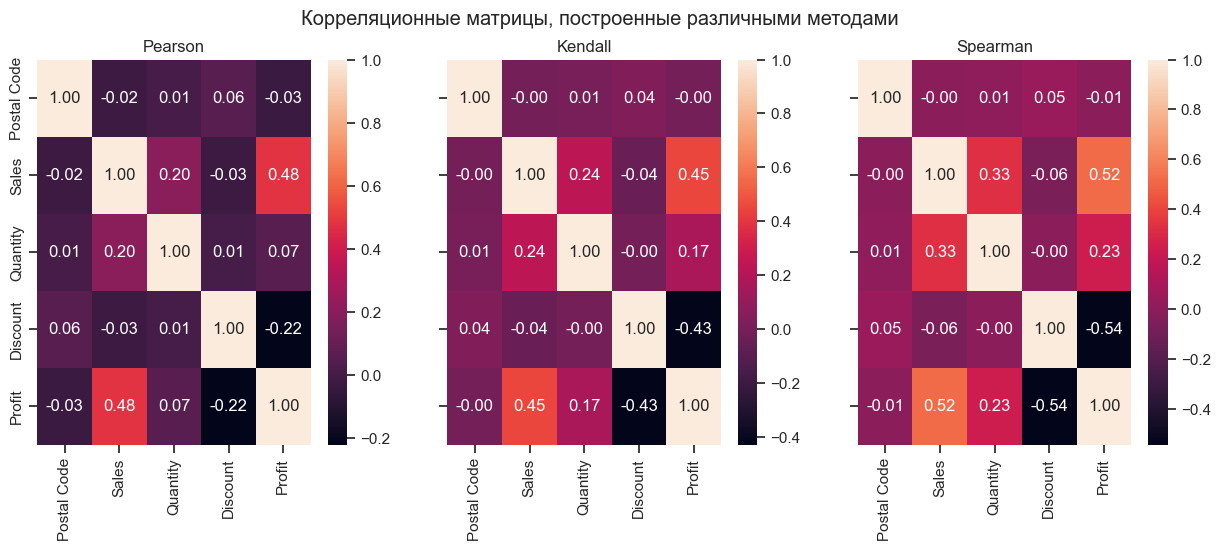

In [33]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data_buff.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data_buff.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data_buff.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')